In [1]:
import numpy as np
from scipy.fftpack import rfft, rfftfreq
import matplotlib.pyplot as plt

In [2]:
%matplotlib widget

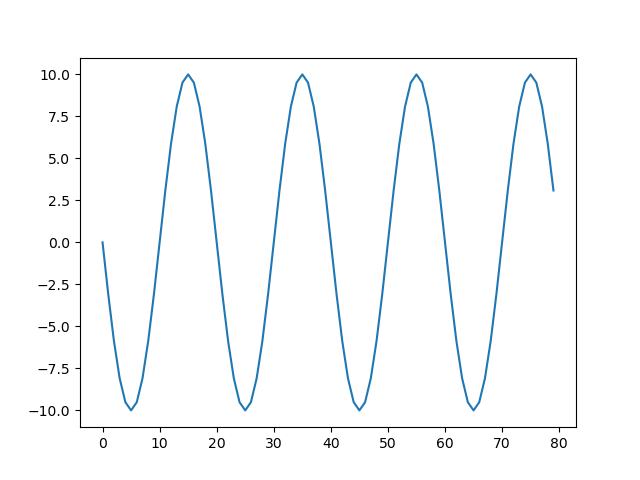

In [7]:
# creacion de la señal

f = 100 # frecuencia de la señal: 100 hz
T = 1/f # periodo 
Fs = 20*f # frecuencia de nyquest
Ts = 1/Fs # periodo de muestreo
n = np.arange(0,4*int(T/Ts))
t = n*Ts
w = 2*np.pi*f
A = 10
phi = np.pi
x = A*np.sin(w*t+phi)

plt.figure()
plt.plot(n, x)

### Signal

In [109]:
def signal_ISB(_f, _A, _phi,_fs, _n):
    f = _f # frecuencia de la señal: 100 hz
    T = 1/f # periodo 
    Fs = _fs #20*f # frecuencia de nyquest
    Ts = 1/Fs # periodo de muestreo
    #n = np.arange(0,4*int(T/Ts))
    #n = np.arange(10000)
    n = _n
    t = n*Ts
    w = 2*np.pi*f
    A = _A
    phi = _phi
    return t, A*np.sin(w*t+phi)

(0.0, 20.0)

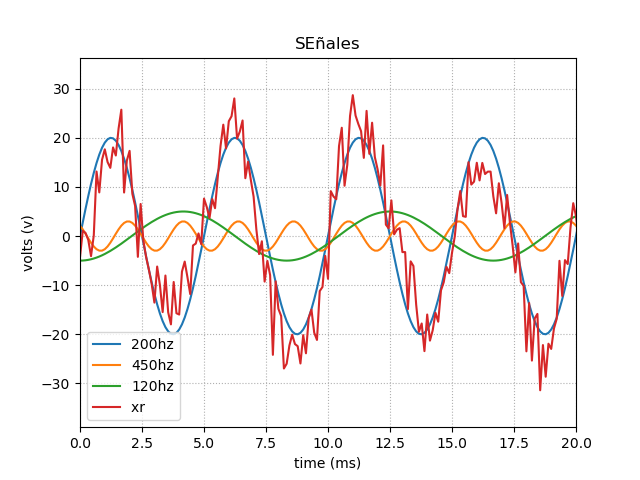

In [63]:
f1 = 200
f2 = 450
f3 = 120
Fs = 20*f2
Ts=1/Fs
n = np.arange(0,2000)

t, x1 = s_signal(_f=f1, _A=20, _phi=0, _fs=Fs,_n=n)
t, x2 = s_signal(_f = f2, _A=3, _phi=3*np.pi/4, _fs=Fs,_n=n)
t, x3 = s_signal(_f = f3, _A=5, _phi=3*np.pi/2, _fs=Fs,_n=n)

xn = np.random.normal(0,4,n.size)

xr = x1+x2+x3+xn
xr = xr - np.mean(xr) # remove noise

plt.figure()
plt.plot(t*1000,x1, label="200hz")
plt.plot(t*1000,x2, label="450hz")
plt.plot(t*1000,x3, label="120hz")
plt.plot(t*1000,xr, label="xr ")
plt.legend()
plt.grid(ls=":")
plt.xlabel("time (ms)")
plt.ylabel("volts (v)")
plt.title("SEñales")
plt.xlim(0,20)

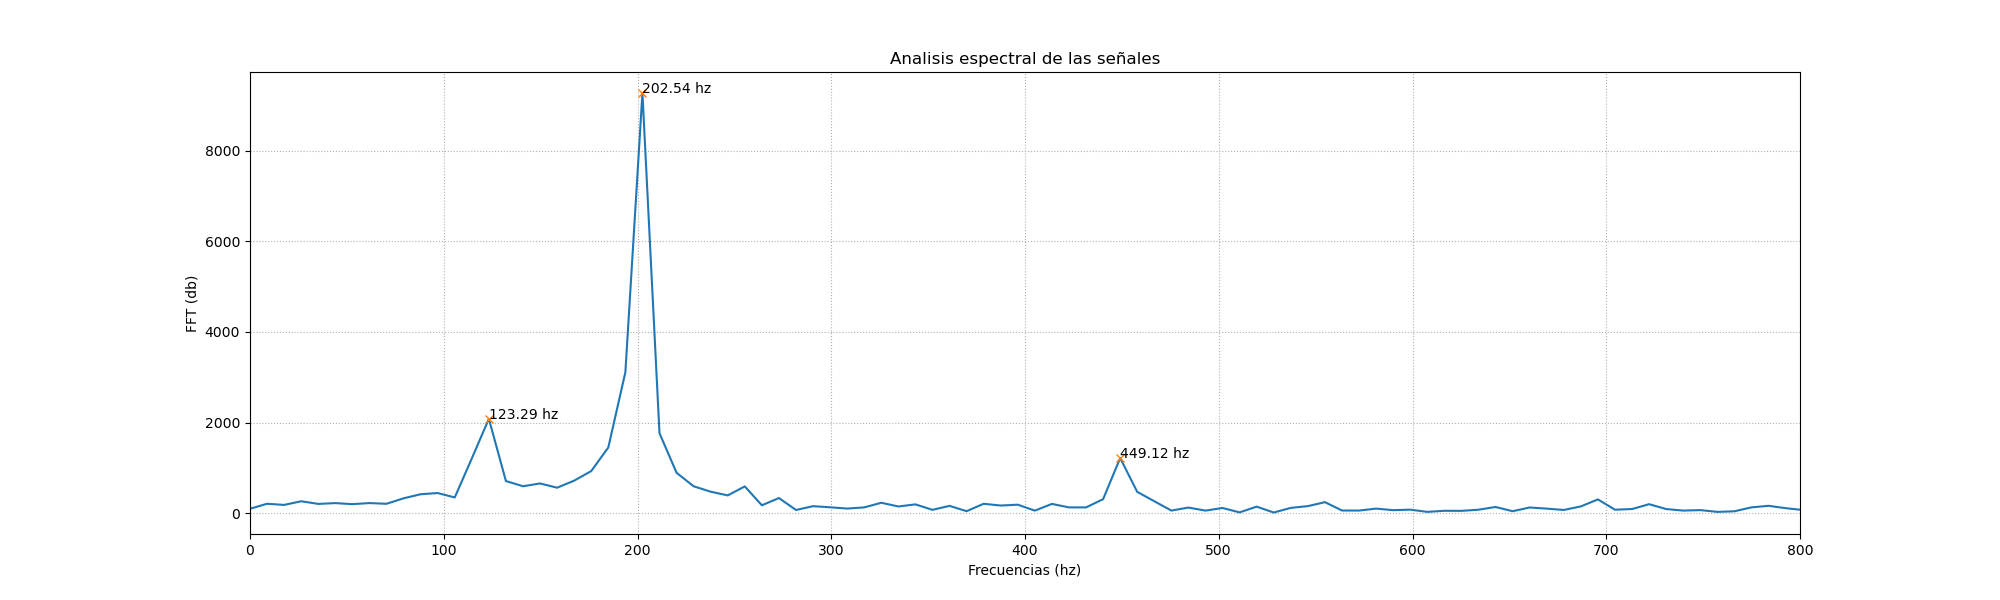

In [82]:
from scipy import signal

N=2**10 # 10 bits

X3 = np.fft.fft(xr,N)
X3 = X3[0:N//2]
X3m = np.abs(X3)
F = np.linspace(0,Fs/2,N//2)

plt.figure(figsize=(20,6))
plt.plot(F, X3m)
plt.grid(linestyle=":")
plt.title("Analisis espectral de las señales")
plt.xlabel("Frecuencias (hz)")
plt.ylabel("FFT (db)")
plt.xlim(0,800)

peaks, properties = signal.find_peaks(X3m, height=700)
plt.plot(F[peaks],properties["peak_heights"],"x")
for p,i in enumerate(F[peaks]):
    plt.text(i,properties["peak_heights"][p], f"{np.round(F[peaks][p],2)} hz")
    
# plt.text(F[peaks][0],properties["peak_heights"][0], f"{np.round(F[peaks][0],2)} hz")
# plt.text(F[peaks][1],properties["peak_heights"][1], f"{np.round(F[peaks][1],2)} hz")
# plt.text(F[peaks][2],properties["peak_heights"][2], f"{np.round(F[peaks][2],2)} hz")

### FFT

In [110]:
def fft_ISB(sig, ts):
    X = rfft(sig)
    vfreqs = rfftfreq(sig.size, ts)
    
    return (vfreqs, np.abs(X3))

In [111]:
def find_peaks_ISB(X, vfreqs, plot=True):
    peaks, properties = find_peaks(X, height=1500, distance=10)
    
    if plot==True:
        plt.plot(vfreqs[peaks],properties["peak_heights"],"x")
        for p,i in enumerate(vfreqs[peaks]):
            plt.text(i,properties["peak_heights"][p], f"{np.round(vfreqs[peaks][p],2)} hz")
    
    return peaks, properties

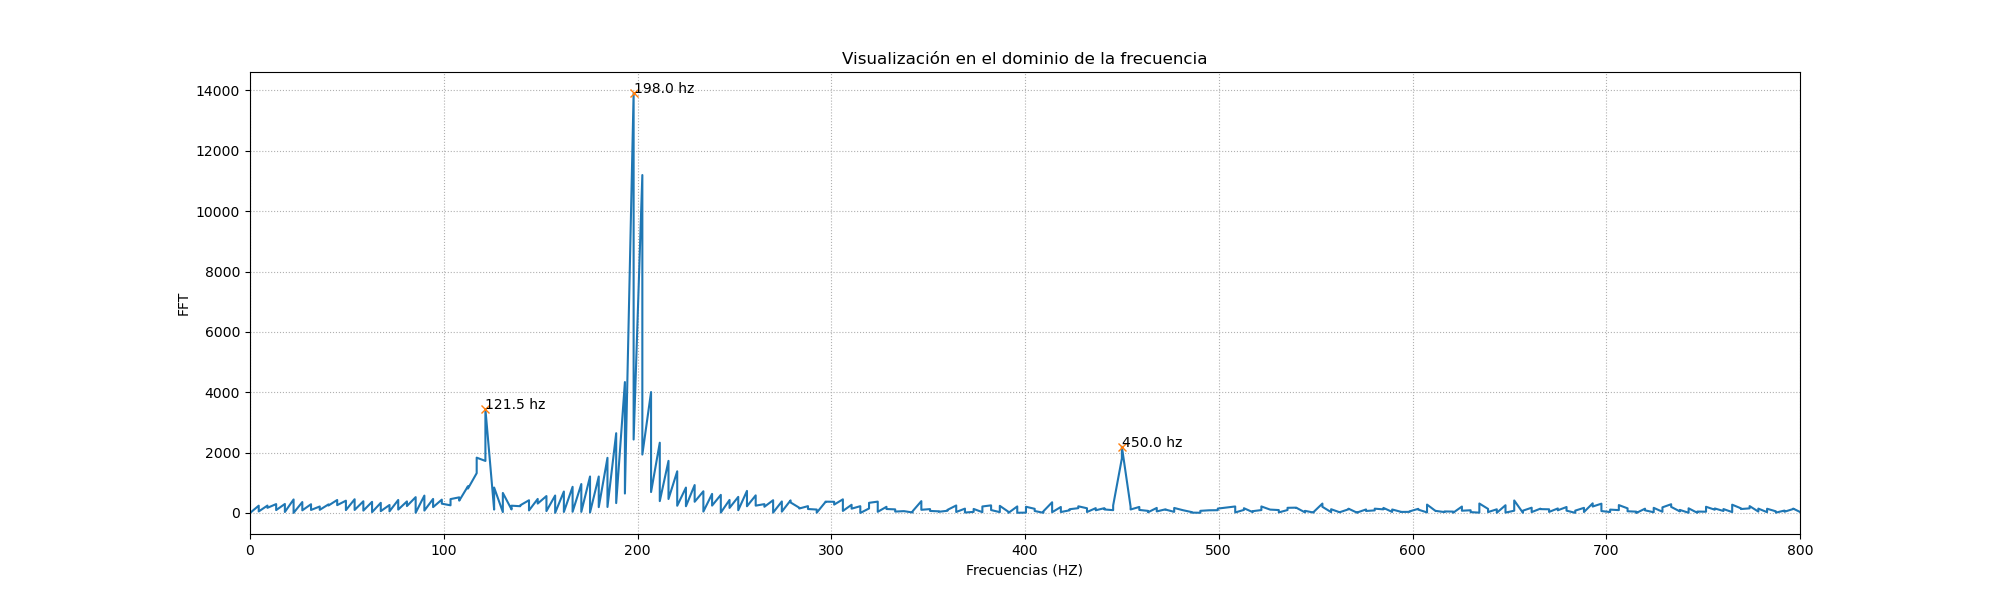

In [97]:
X3 = rfft(xr)
vfreqs = rfftfreq(xr.size, Ts)

plt.figure(figsize=(20,6))
plt.plot(vfreqs, np.abs(X3))
plt.xlim(0,800)
plt.grid(ls=":")
plt.xlabel("Frecuencias (HZ)")
plt.ylabel("FFT")
plt.title("Visualización en el dominio de la frecuencia")

# encontrar picos
peaks, properties = signal.find_peaks(X3, height=1500, distance=10)
plt.plot(vfreqs[peaks],properties["peak_heights"],"x")
for p,i in enumerate(vfreqs[peaks]):
    plt.text(i,properties["peak_heights"][p], f"{np.round(vfreqs[peaks][p],2)} hz")

### DSP

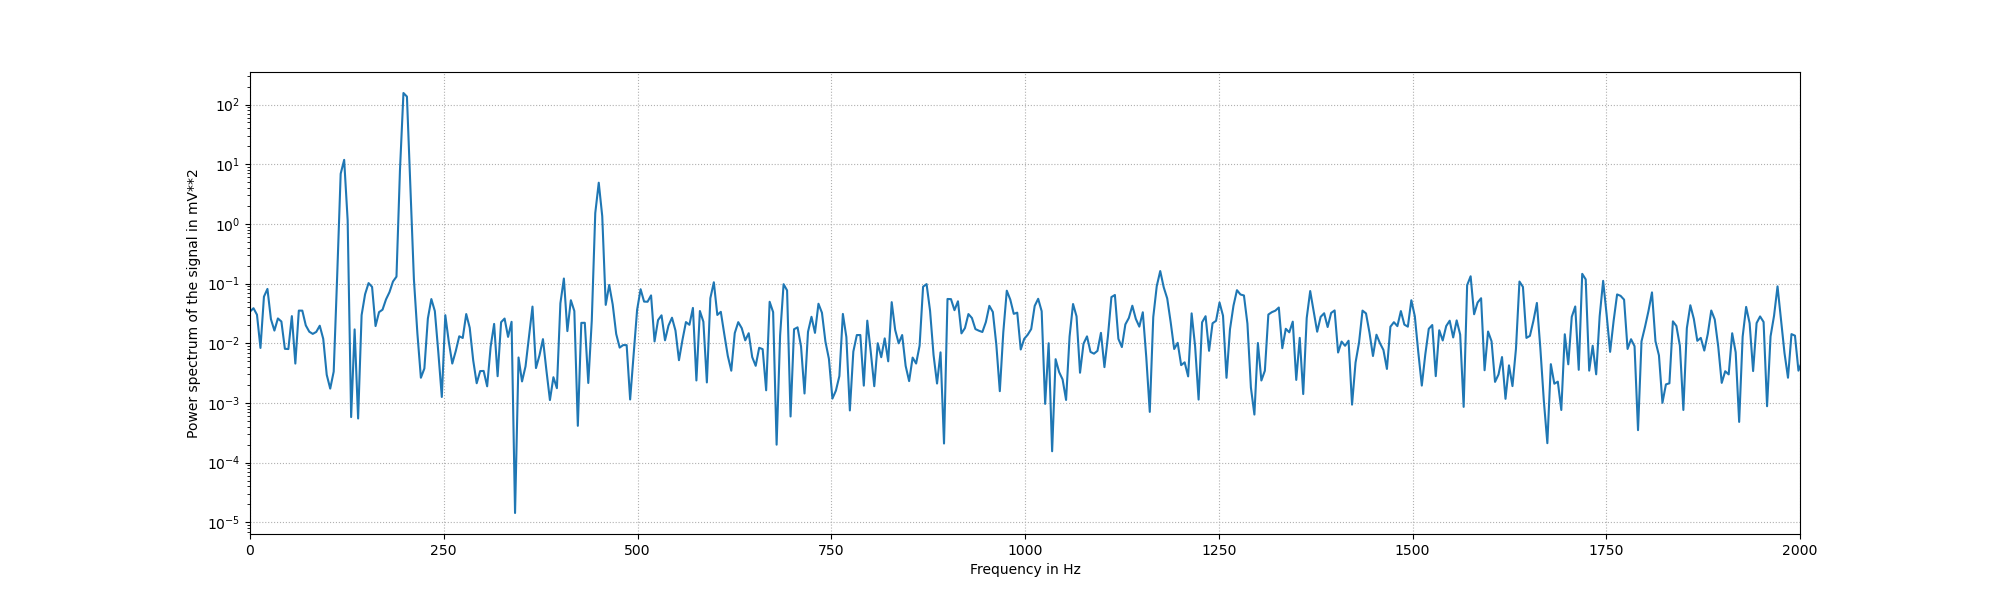

In [61]:
from scipy.signal import welch

f, Pxx = welch(xr, fs=Fs, nperseg=2*2048, scaling="spectrum")

plt.figure(figsize=(20,6))
plt.semilogy(f, Pxx)
plt.xlabel("Frequency in Hz")
plt.ylabel("Power spectrum of the signal in mV**2")
plt.xlim(0,2000)
plt.grid(ls=":")
plt.show()

### Filtrado

In [103]:
from scipy.signal import firwin, lfilter

M = 80 # orden
Fc = 300 # frecuencia de corte
wc = 2*np.pi*Fc/Fs # Fc en radianes

W = firwin(numtaps=M, cutoff=Fc, window="hamming", fs =Fs)
W = np.round(W,3)
W

array([ 0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,
        0.001,  0.   , -0.   , -0.001, -0.002, -0.002, -0.003, -0.004,
       -0.005, -0.006, -0.007, -0.007, -0.007, -0.007, -0.006, -0.004,
       -0.001,  0.002,  0.006,  0.01 ,  0.015,  0.021,  0.027,  0.033,
        0.039,  0.045,  0.05 ,  0.055,  0.06 ,  0.063,  0.065,  0.066,
        0.066,  0.065,  0.063,  0.06 ,  0.055,  0.05 ,  0.045,  0.039,
        0.033,  0.027,  0.021,  0.015,  0.01 ,  0.006,  0.002, -0.001,
       -0.004, -0.006, -0.007, -0.007, -0.007, -0.007, -0.006, -0.005,
       -0.004, -0.003, -0.002, -0.002, -0.001, -0.   ,  0.   ,  0.001,
        0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001])

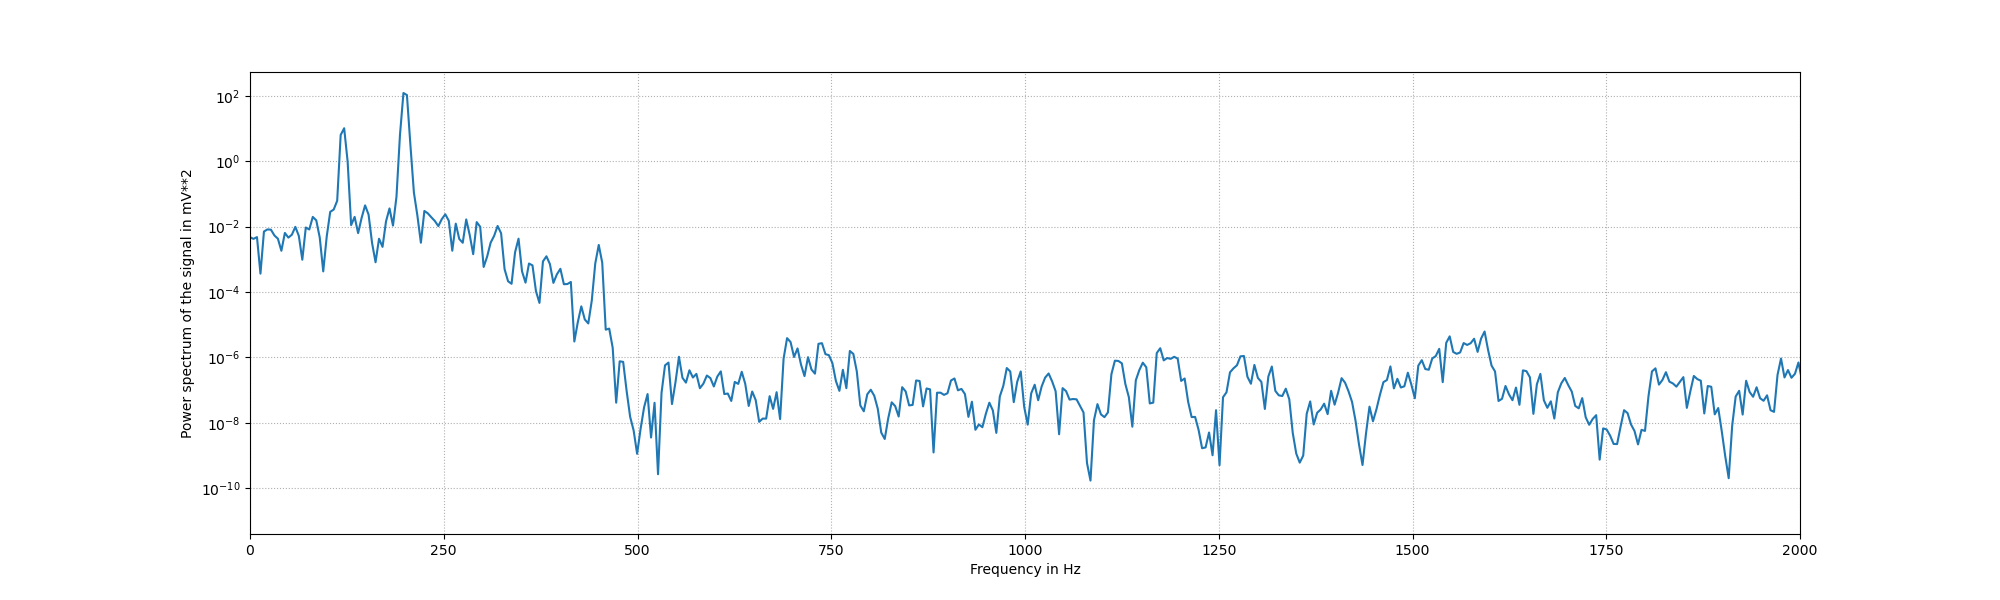

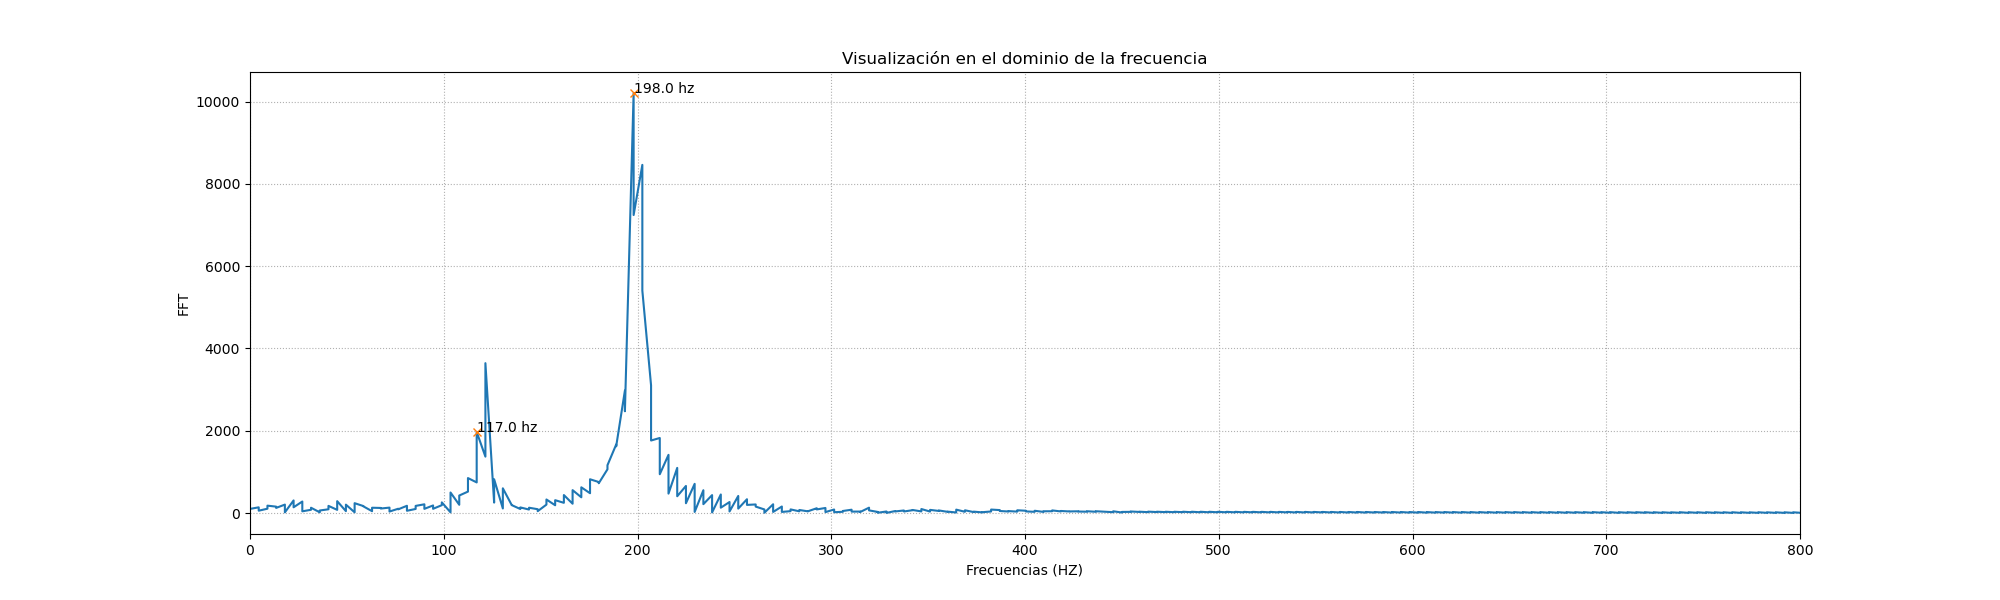

In [104]:
xf = lfilter(W,1,xr)

X3 = rfft(xf)
vfreqs = rfftfreq(xr.size, Ts)

plt.figure(figsize=(20,6))
plt.plot(vfreqs, np.abs(X3))
plt.xlim(0,800)
plt.grid(ls=":")
plt.xlabel("Frecuencias (HZ)")
plt.ylabel("FFT")
plt.title("Visualización en el dominio de la frecuencia")

# encontrar picos
peaks, properties = signal.find_peaks(X3, height=1500, distance=10)
plt.plot(vfreqs[peaks],properties["peak_heights"],"x")
for p,i in enumerate(vfreqs[peaks]):
    plt.text(i,properties["peak_heights"][p], f"{np.round(vfreqs[peaks][p],2)} hz")
    

f, Pxx = welch(xf, fs=Fs, nperseg=2*2048, scaling="spectrum")

plt.figure(figsize=(20,6))
plt.semilogy(f, Pxx)
plt.xlabel("Frequency in Hz")
plt.ylabel("Power spectrum of the signal in mV**2")
plt.xlim(0,2000)
plt.grid(ls=":")
plt.show()

### Filtrado con pyfdax

In [105]:
b = [-0.0012495369105667625,-0.003823614006897268,-0.006411709692947954,-0.008904336441704068,-0.011188039833436888,-0.013149238963851421,-0.01467820914475445,-0.015673068138317203,-0.016043623948917656,-0.015714944127529745,-0.01463051362834054,-0.012754860308386896,-0.010075543803203918,-0.006604424193731644,-0.002378150894304455,0.0025421613008082267,0.008072074014560894,0.014105761324485478,0.02051868832218762,0.027170953881203865,0.03391119522256419,0.04058093116490937,0.04701920441495162,0.05306737152334301,0.05857388265715633,0.06339889238947569,0.06741854734433074,0.07052880662242741,0.07264866613104802,0.07372267772343838,0.07372267772343838,0.07264866613104802,0.07052880662242741,0.06741854734433074,0.06339889238947569,0.05857388265715633,0.05306737152334301,0.04701920441495162,0.04058093116490937,0.03391119522256419,0.027170953881203865,0.02051868832218762,0.014105761324485478,0.008072074014560894,0.0025421613008082267,-0.002378150894304455,-0.006604424193731644,-0.010075543803203918,-0.012754860308386896,-0.01463051362834054,-0.015714944127529745,-0.016043623948917656,-0.015673068138317203,-0.01467820914475445,-0.013149238963851421,-0.011188039833436888,-0.008904336441704068,-0.006411709692947954,-0.003823614006897268,-0.0012495369105667625]

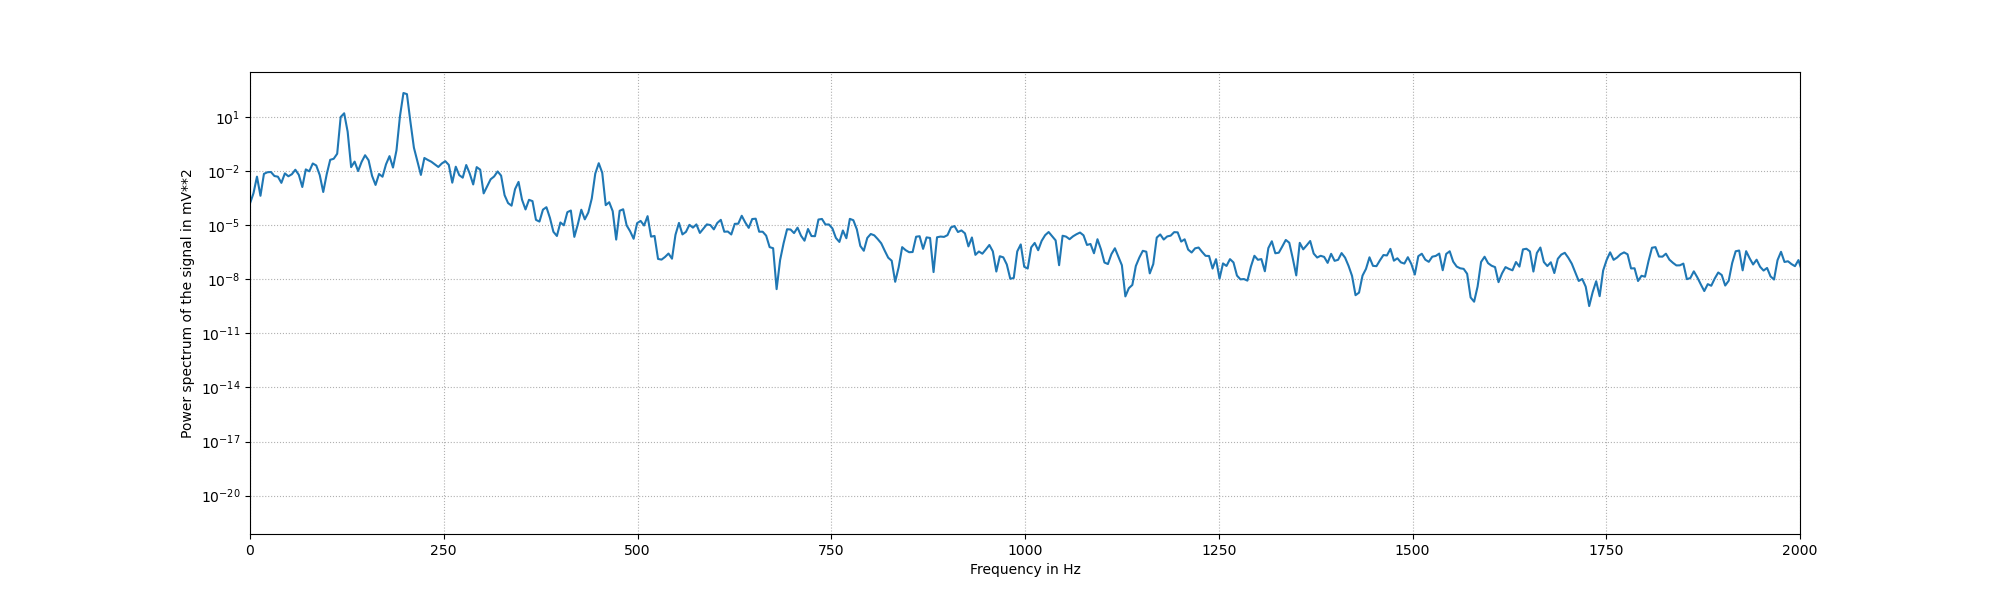

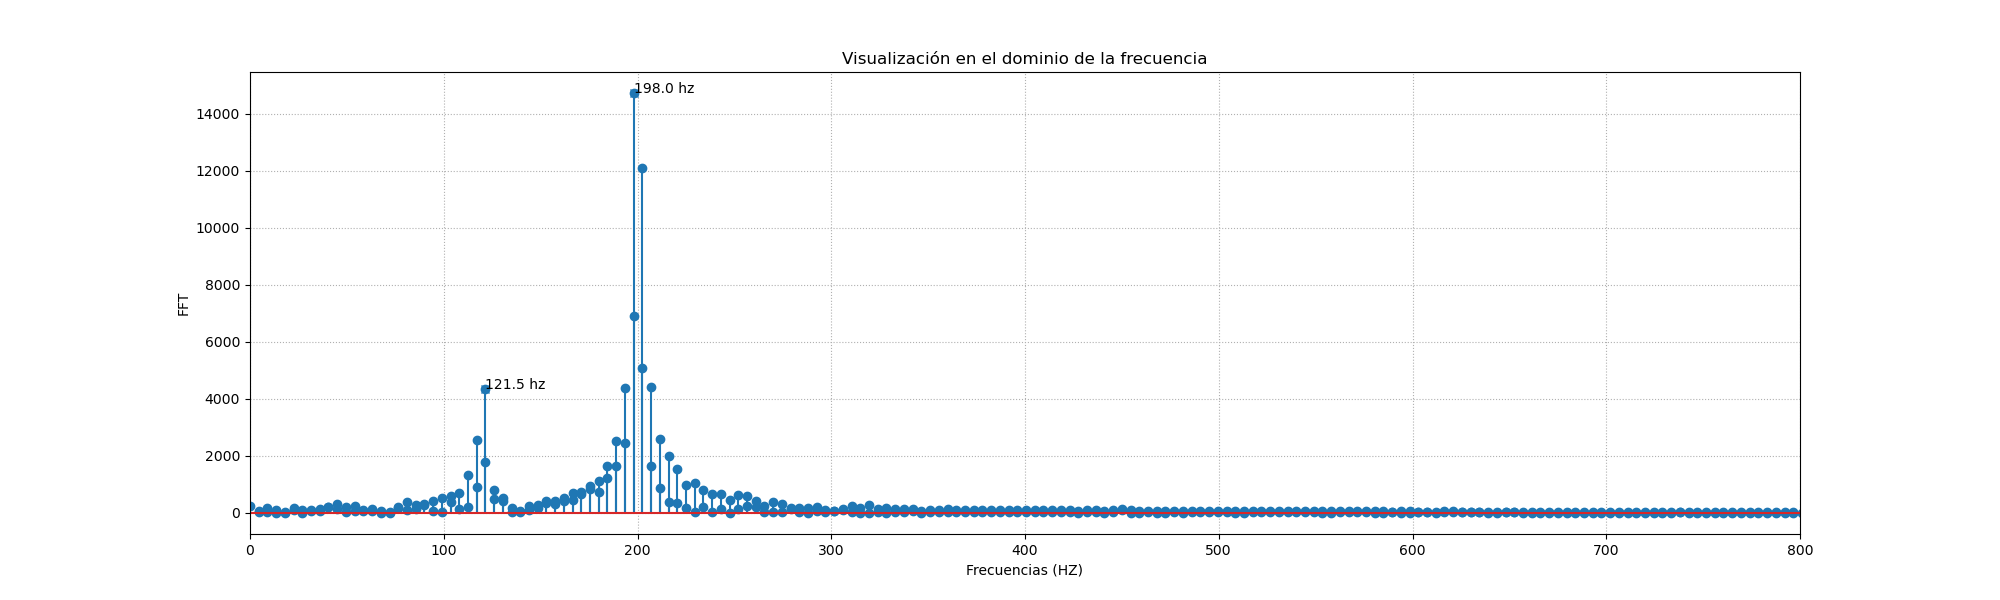

In [107]:
W2 = b

xf = lfilter(W2,1,xr)

X3 = rfft(xf)
vfreqs = rfftfreq(xr.size, Ts)

plt.figure(figsize=(20,6))
plt.stem(vfreqs, np.abs(X3))
plt.xlim(0,800)
plt.grid(ls=":")
plt.xlabel("Frecuencias (HZ)")
plt.ylabel("FFT")
plt.title("Visualización en el dominio de la frecuencia")

# encontrar picos
peaks, properties = signal.find_peaks(X3, height=1500, distance=10)
plt.plot(vfreqs[peaks],properties["peak_heights"],"x")
for p,i in enumerate(vfreqs[peaks]):
    plt.text(i,properties["peak_heights"][p], f"{np.round(vfreqs[peaks][p],2)} hz")
    

f, Pxx = welch(xf, fs=Fs, nperseg=2*2048, scaling="spectrum")

plt.figure(figsize=(20,6))
plt.semilogy(f, Pxx)
plt.xlabel("Frequency in Hz")
plt.ylabel("Power spectrum of the signal in mV**2")
plt.xlim(0,2000)
plt.grid(ls=":")
plt.show()